# 逻辑回归

### 1. 准备数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [3]:
# 由于鸢尾花数据有三类，而逻辑回归只能解决二分类问题，所以需要对数据处理

In [4]:
X = X[y<2, :2]
y = y[y<2]

In [5]:
X.shape

(100, 2)

In [6]:
y.shape

(100,)

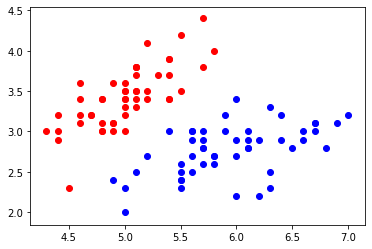

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")

### 2. 使用逻辑回归 

In [8]:
from LogisticReg.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [9]:
from LogisticReg.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [10]:
log_reg.score(X_test, y_test)

1.0

In [11]:
# 显示每个数据得概率
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [12]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [13]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [14]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [15]:
log_reg.intercept_

-0.6937719272911225

### 3. 决策边界

$$
    \hat{y} = 
    \begin{cases}
    1, & \text{$\hat{y} \geq 0.5$} & \text{$\theta^T \cdot x_b \geq 0$} \\
    0, & \text{$\hat{y} < 0.5$} & \text{$\theta^T \cdot x_b < 0$}
    \end{cases}
$$

- 决策边界： $\theta^T \cdot x_b = 0$
- 如果 X 有两个特征，有
$$\theta_0 + \theta_1 x1 + \theta_2 x2 = 0$$
$$\Downarrow$$
$$x_2 = \frac{-\theta_0 - \theta_1 x_1}{\theta_2}$$

In [16]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

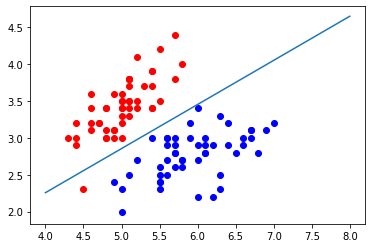

In [17]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.plot(x1_plot, x2_plot)

In [18]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predic = model.predict(X_new)
    zz = y_predic.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF590', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


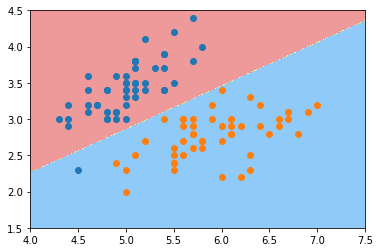

In [19]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

### kNN中的决策边界

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
knn_clf.score(X_test, y_test)

1.0

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


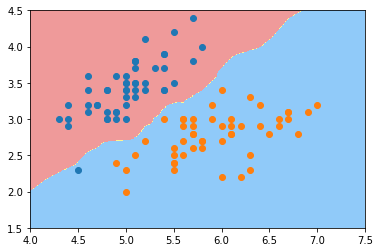

In [23]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [24]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


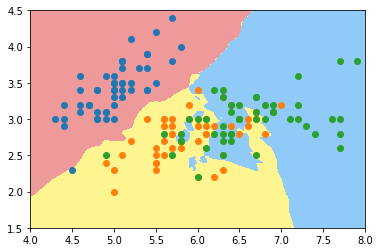

In [27]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])

- 可以看出决策边界很复杂，说明模型发生了过拟合。我们增大 k 再次绘制

In [34]:
knn_clf_all2 = KNeighborsClassifier(n_neighbors=30)
knn_clf_all2.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

/home/js/pyEnvs/tf_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


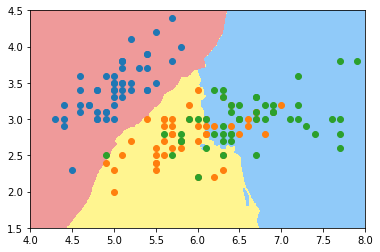

In [35]:
plot_decision_boundary(knn_clf_all2, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])